# Activity 3

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import statsmodels.api as sm

## Importing and reading files

In [2]:
df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv',sep=',')
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [4]:
df.columns = df.columns.str.lower() 
#all headers in low case
df = df.drop(columns=['unnamed: 0', 'vehicle type',"customer"]) 
# deleting useless column
df.columns=[x.lower().replace(' ', '_') for x in df.columns] 
#standardizing header labels
df = df.dropna() 
#deleting all rows where all elemens are missing # deleting rows with all values NAN
df=df.drop_duplicates()
# removing duplicates
df.head(5)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
6,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,Urban,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize


## Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [5]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
df=df.drop(columns=['effective_to_date'])
df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,February
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,January
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,February
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,January
6,California,5035.035257,No,Basic,Doctor,Employed,F,37405,Urban,Married,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,Arizona,2771.663013,No,Basic,College,Employed,M,59855,Suburban,Married,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,January
10904,Nevada,19228.463620,No,Basic,High School or Below,Unemployed,M,0,Suburban,Single,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,February
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,January
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,February


# Activity 4

- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't limit your creativity! plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data - - Cleaning, Exploration(including plots) Steps that you have performed.

### Show a plot of the total number of responses.

/home/bianca/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


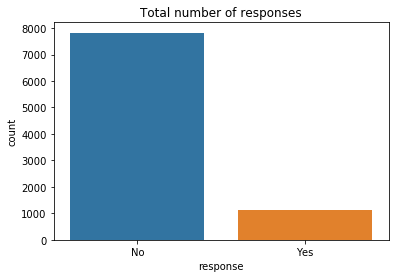

In [6]:
sns.countplot('response', data= df)
plt.title('Total number of responses')
plt.show()

### Show a plot of the response rate by the sales channel.

/home/bianca/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


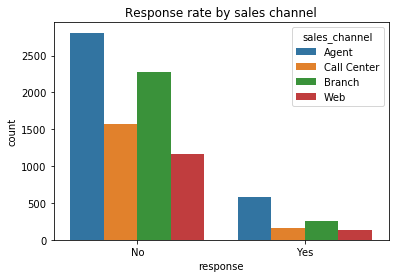

In [7]:
sns.countplot('response', hue='sales_channel', data=df)
plt.title('Response rate by sales channel')
plt.show()

### Show a plot of the response rate by the total claim amount.

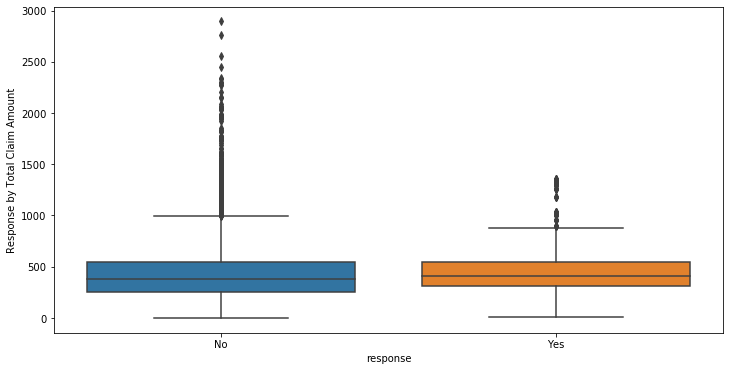

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=df)
plt.ylabel('Response by Total Claim Amount')
plt.show()

### Show a plot of the response rate by income.

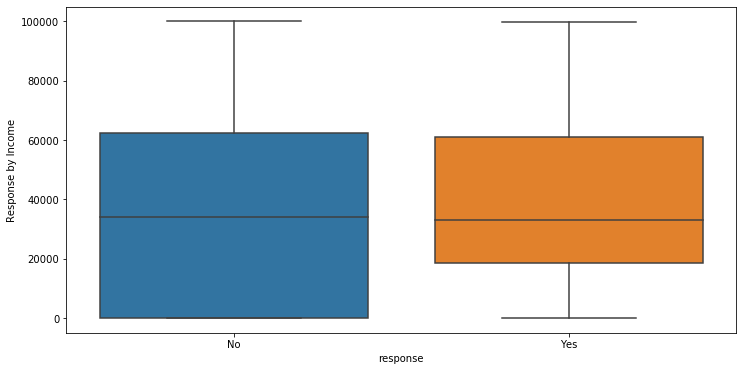

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=df)
plt.ylabel('Response by Income')
plt.show()

### Plot the Correlation Heatmap

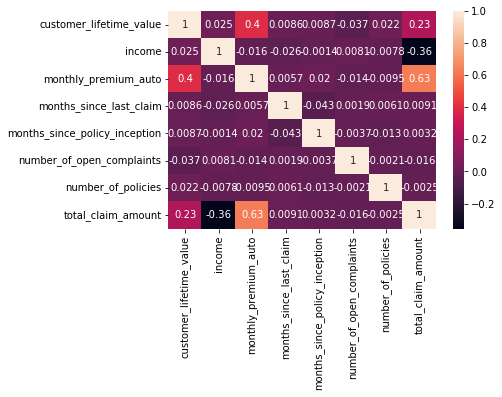

In [10]:
#Plot the Correlation Heatmap
sns.heatmap(df.corr(), annot=True)

In [11]:
#XY Split
x=df.drop('total_claim_amount', axis=1)
y=df.total_claim_amount

In [12]:
# selecting numerical columns
numericals = df.select_dtypes(include=np.number).fillna(0)

In [13]:
numericals.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.025332,0.398702,0.008609,0.008715,-0.037128,0.022039,0.227534
income,0.025332,1.000000,-0.016478,-0.026008,-0.001438,0.008091,-0.007824,-0.355936
monthly_premium_auto,0.398702,-0.016478,1.000000,0.005730,0.019598,-0.013546,-0.009477,0.630994
months_since_last_claim,0.008609,-0.026008,0.005730,1.000000,-0.043088,0.001899,0.006098,0.009106
months_since_policy_inception,0.008715,-0.001438,0.019598,-0.043088,1.000000,-0.003693,-0.012592,0.003236
number_of_open_complaints,-0.037128,0.008091,-0.013546,0.001899,-0.003693,1.000000,-0.002128,-0.015620
number_of_policies,0.022039,-0.007824,-0.009477,0.006098,-0.012592,-0.002128,1.000000,-0.002472
total_claim_amount,0.227534,-0.355936,0.630994,0.009106,0.003236,-0.015620,-0.002472,1.000000


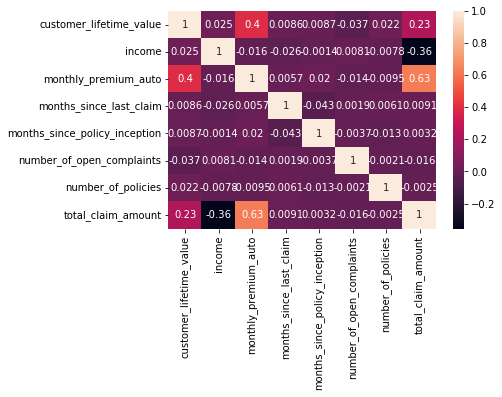

In [14]:
sns.heatmap(numericals.corr(), annot=True)

In [15]:
numericals.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000,8971.000000
mean,8004.192319,37644.828113,93.192621,15.099209,48.054175,0.385241,2.970349,433.886437
std,6867.941039,30431.741597,34.358960,10.077668,27.916442,0.909666,2.391832,291.074428
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3999.497700,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.472690
50%,5792.439588,33947.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.442328
75%,8954.637109,62365.500000,109.000000,23.000000,71.000000,0.000000,4.000000,547.988754
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


 ## Categorical variables transformation

In [16]:
#selecting categorical columns
categoricals = x.select_dtypes(include=['object'])

# get dummies pandas
cat=pd.get_dummies(categoricals)
cat

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,month_February,month_January
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
6,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1
10904,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
10906,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0


In [17]:
x_scaled=StandardScaler().fit_transform(numericals)
x_scaled.shape

(8971, 8)

In [18]:
x_scaled

array([[-0.46522727,  0.34124733, -0.93700202, ..., -0.42352115,
         2.52107482, -0.48473616],
       [-0.84100737, -1.23709405, -0.84968368, ..., -0.42352115,
        -0.82382827,  1.068645  ],
       [ 1.0110908 , -0.50955652,  0.19813634, ..., -0.42352115,
        -0.40571538,  0.15843416],
       ...,
       [-0.39966861,  0.77230157, -0.82057757, ..., -0.42352115,
         1.26673616, -0.55269876],
       [ 2.31364791,  0.07203972,  3.13785365, ..., -0.42352115,
        -0.40571538, -0.18064923],
       [ 0.5777578 ,  0.8724986 ,  1.88629084, ...,  3.97394208,
         1.26673616,  0.63355854]])

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=.20)

In [21]:
x_train


array([[ 3.21036271e-01, -7.10754152e-02,  1.04221359e+00, ...,
        -4.23521149e-01,  1.23975062e-02,  6.36689020e-01],
       [ 2.53845069e-02, -1.23709405e+00,  5.47409688e-01, ...,
        -4.23521149e-01,  1.68484905e+00,  1.27985935e+00],
       [-3.34836975e-01,  9.91516337e-04, -6.45940901e-01, ...,
        -4.23521149e-01,  1.23975062e-02, -1.81979454e-01],
       ...,
       [-7.40847233e-01,  1.58304633e+00, -6.16834789e-01, ...,
        -4.23521149e-01, -8.23828266e-01, -9.58223042e-01],
       [-7.40958774e-01,  1.60874462e+00, -5.87728677e-01, ...,
        -4.23521149e-01, -8.23828266e-01, -2.86837601e-01],
       [-5.32892147e-01,  3.42068891e-01,  4.60091352e-01, ...,
        -4.23521149e-01, -8.23828266e-01,  3.06858084e-01]])

In [22]:
y_train

5383     619.200000
2610     806.400000
4057     380.919824
8389     316.800000
976      928.800000
           ...     
3382    1452.213743
3917     537.315879
7215     154.987759
245      350.400000
3070     523.200000
Name: total_claim_amount, Length: 7176, dtype: float64

In [24]:
Y = y
X = sm.add_constant(cat)

x_train = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train).fit()
predictions = model.predict(x_train)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.693e+31
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:16:28   Log-Likelihood:             1.8705e+05
No. Observations:                7176   AIC:                        -3.741e+05
Df Residuals:                    7167   BIC:                        -3.740e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.8864   1.37e-14   3.17e+16      0.0

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=.20)
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
model.coef_

array([-3.25985250e-13, -8.52651283e-14,  1.84741111e-13,  7.54951657e-15,
       -2.74780199e-14, -1.59872116e-14, -3.99680289e-14,  2.91058204e+02])

In [30]:
y_pred=model.predict(x_test)
y_pred

array([321.6     , 350.4     ,   9.160139, ..., 314.143133, 247.402353,
       297.864823])

In [32]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
755,321.600000,321.600000
5812,350.400000,350.400000
6059,9.160139,9.160139
9419,417.600000,417.600000
2990,653.656680,653.656680
...,...,...
4301,133.284622,133.284622
2114,915.188647,915.188647
8238,314.143133,314.143133
7,247.402353,247.402353


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'Test Set Residual histogram')

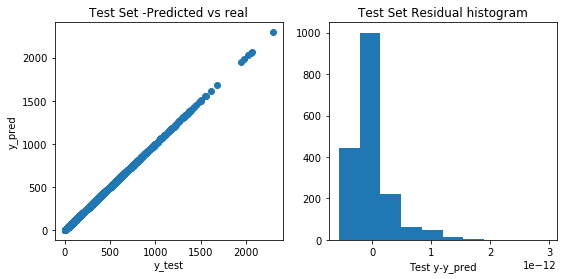

In [33]:
fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")